In [3]:
import numpy as np
import matplotlib.pyplot as plt

#dataset4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

#def sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

w = np.zeros(len(x_d4[0]))
l_r = 0.0002
lamb = 0.002
loss = []
times=0
#grad
for iteration in range(0,50):
    for x,y in zip(x_d4,y_d4):
        a = np.zeros(len(x))
        for x,y in zip(x_d4,y_d4):
            a += -np.dot(x,y) * (1 - sigmoid(np.dot(np.dot(y, w), x)))
            a += 2 * lamb * w
        grad=(-a)
        temp = np.dot(w,x)

        k=temp>0 if 1 else -1
        w = w + l_r * grad
    for x,y in zip(x_d4,y_d4):
        temp += np.log(1 / sigmoid(np.dot(np.dot(y,w), x))) + lamb * np.dot(w,w)
    loss.append(temp)
    print("%d:%s" %(times,w))
    times+=1

#newton
w = np.zeros(len(x_d4[0]))
l_r = 0.002
lamb = 0.002
loss_new = []
times=0
for iteration in range(0,50):
    for x,y in zip(x_d4, y_d4):
        temp = np.dot(w,x)
        a = np.zeros(len(x))
        for x,y in zip(x_d4,y_d4):
            a += -np.dot(x,y) * (1 - sigmoid(np.dot(np.dot(y, w), x)))
            a += 2 * lamb * w
        grad=(-a)
        h_m = np.zeros((len(x_d4[0]),len(x_d4[0])))
        I_m = np.identity(len(x_d4[0]))        
        for x,y in zip(x_d4, y_d4):
            h_m += (sigmoid(np.dot(np.dot(y,w), x)) - sigmoid(np.dot(np.dot(y,w), x)) ** 2) * np.dot(np.reshape(x, (4,1)),np.reshape(x, (1,4)))
            h_m += 2 * lamb * I_m
        w += l_r * np.dot(np.linalg.inv(h_m),grad)

    temp=0
    for x,y in zip(x_d4,y_d4):
        temp += np.log(1 / sigmoid(np.dot(np.dot(y,w), x))) + lamb * np.dot(w,w)
    loss_new.append(temp)
    print("%d:%s" %(times,w))
    times+=1

ds = [loss[i]-loss_new[49] for i in range(0,50)]
dn = [loss_new[i] - loss_new[49] for i in range(0,50)]
iteration=[]
for i in range(0,40):
    iteration.append(i)
    




0:[ 1.51378503 -0.49699977 -0.11418285  0.01410116]
1:[ 2.12566312 -0.74806576 -0.14369524  0.01280512]
2:[ 2.4928702  -0.92172263 -0.15929426  0.01633629]
3:[ 2.74767069 -1.05071559 -0.16968444  0.02199773]
4:[ 2.93767126 -1.14990363 -0.17730321  0.02820048]
5:[ 3.08539801 -1.22795541 -0.18316754  0.03424148]
6:[ 3.2033615  -1.29044864 -0.18781238  0.03983377]
7:[ 3.29928605 -1.34117105 -0.19156169  0.04487965]
8:[ 3.37830975 -1.38279272 -0.19462959  0.04936784]
9:[ 3.44404144 -1.41725176 -0.19716593  0.05332586]
10:[ 3.49912132 -1.44598956 -0.19927984  0.05679739]
11:[ 3.54554213 -1.47010056 -0.20105311  0.05983126]
12:[ 3.58484494 -1.49043071 -0.20254847  0.06247611]
13:[ 3.61824462 -1.50764417 -0.20381493  0.06477782]
14:[ 3.64671383 -1.52226937 -0.20489134  0.06677841]
15:[ 3.67104106 -1.53473171 -0.20580894  0.06851571]
16:[ 3.69187214 -1.54537711 -0.20659308  0.07002336]
17:[ 3.70974053 -1.55448929 -0.20726455  0.07133109]
18:[ 3.72509003 -1.56230278 -0.20784055  0.07246499]
19:

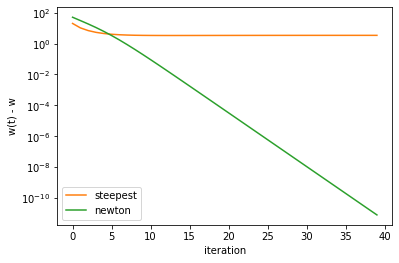

In [2]:
plt.semilogy(y)
plt.plot(iteration, ds[:40], label = 'steepest')
plt.plot(iteration, dn[:40], label ='newton')
plt.xlabel('iteration')
plt.ylabel('w(t) - w')
plt.legend()